In [ ]:
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv('clean_train_data.csv')

# In ra thông tin tổng quan về DataFrame
print("Thông tin tổng quan về DataFrame:")
print(df.info())

# In ra một vài dòng đầu tiên của DataFrame
print("\\nMột vài dòng đầu tiên của DataFrame:")
print(df.head())

# Thống kê mô tả dữ liệu
print("\\nThống kê mô tả dữ liệu:")
print(df.describe())

# Kiểm tra missing values
print("\\nSố lượng missing values trên mỗi cột:")
print(df.isnull().sum())

Thông tin tổng quan về DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5813 entries, 0 to 5812
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedroom             3725 non-null   float64
 1   bathroom            3532 non-null   float64
 2   facade_width        2711 non-null   float64
 3   road_width          2514 non-null   float64
 4   floor_count         1991 non-null   float64
 5   price_vnd           5813 non-null   float64
 6   price_per_m2_vnd    5813 non-null   float64
 7   area_m2             5813 non-null   float64
 8   latitude            5809 non-null   float64
 9   longitude           5809 non-null   float64
 10  price_per_m2_ratio  5769 non-null   float64
 11  area_ratio          5813 non-null   float64
 12  area_per_room       3725 non-null   float64
 13  comfort_index       5813 non-null   float64
 14  facade_area_ratio   2711 non-null   float64
 15  road_facade_ratio   2

In [ ]:
import numpy as np
# 1. Điền median cho các cột thiếu ít
for col in ['latitude', 'longitude', 'price_per_m2_ratio']:
    median = df[col].median()
    df[col] = df[col].fillna(median)

# 2. Điền -1 cho các cột thiếu nhiều (trên 30%)
cols_many_missing = ['bedroom', 'bathroom', 'facade_width', 'road_width', 'floor_count',
                     'facade_area_ratio', 'road_facade_ratio', 'area_per_room']
for col in cols_many_missing:
    df[col] = df[col].fillna(-1)

# 3. Thử tính lại area_per_room nếu bedroom và bathroom hợp lệ
mask = (df['area_per_room'] == -1) & (df['bedroom'] > 0) & (df['bathroom'] > 0)
# Tổng số phòng ngủ + phòng tắm
room_sum = df.loc[mask, 'bedroom'] + df.loc[mask, 'bathroom']
df.loc[mask, 'area_per_room'] = df.loc[mask, 'area_m2'] / room_sum

# Kiểm tra lại missing value sau khi xử lý
missing_after = df.isnull().sum()
print("Số lượng missing value sau khi xử lý:")
print(missing_after)

df.to_csv("missing_value_data.csv", index=False)

Số lượng missing value sau khi xử lý:
bedroom               0
bathroom              0
facade_width          0
road_width            0
floor_count           0
price_vnd             0
price_per_m2_vnd      0
area_m2               0
latitude              0
longitude             0
price_per_m2_ratio    0
area_ratio            0
area_per_room         0
comfort_index         0
facade_area_ratio     0
road_facade_ratio     0
distance_to_center    0
location_cluster      0
dtype: int64


Thống kê mô tả:
           bedroom     bathroom  facade_width   road_width  floor_count  \
count  5813.000000  5813.000000   5813.000000  5813.000000  5813.000000   
mean      1.871151     1.531567      3.016687     4.164803     0.644590   
std       3.160549     3.018795     11.986510     8.841050     2.445473   
min      -1.000000    -1.000000     -1.000000    -1.000000    -1.000000   
25%      -1.000000    -1.000000     -1.000000    -1.000000    -1.000000   
50%       2.000000     2.000000     -1.000000    -1.000000    -1.000000   
75%       3.000000     3.000000      5.000000     6.000000     3.000000   
max      33.000000    35.000000    476.000000   120.000000    10.000000   

          price_vnd  price_per_m2_vnd      area_m2     latitude    longitude  \
count  5.813000e+03      5.813000e+03  5813.000000  5813.000000  5813.000000   
mean   8.543473e+09      9.990400e+07    84.554395    15.666616   106.519517   
std    7.245729e+09      7.586265e+07    39.742081     4.898410     

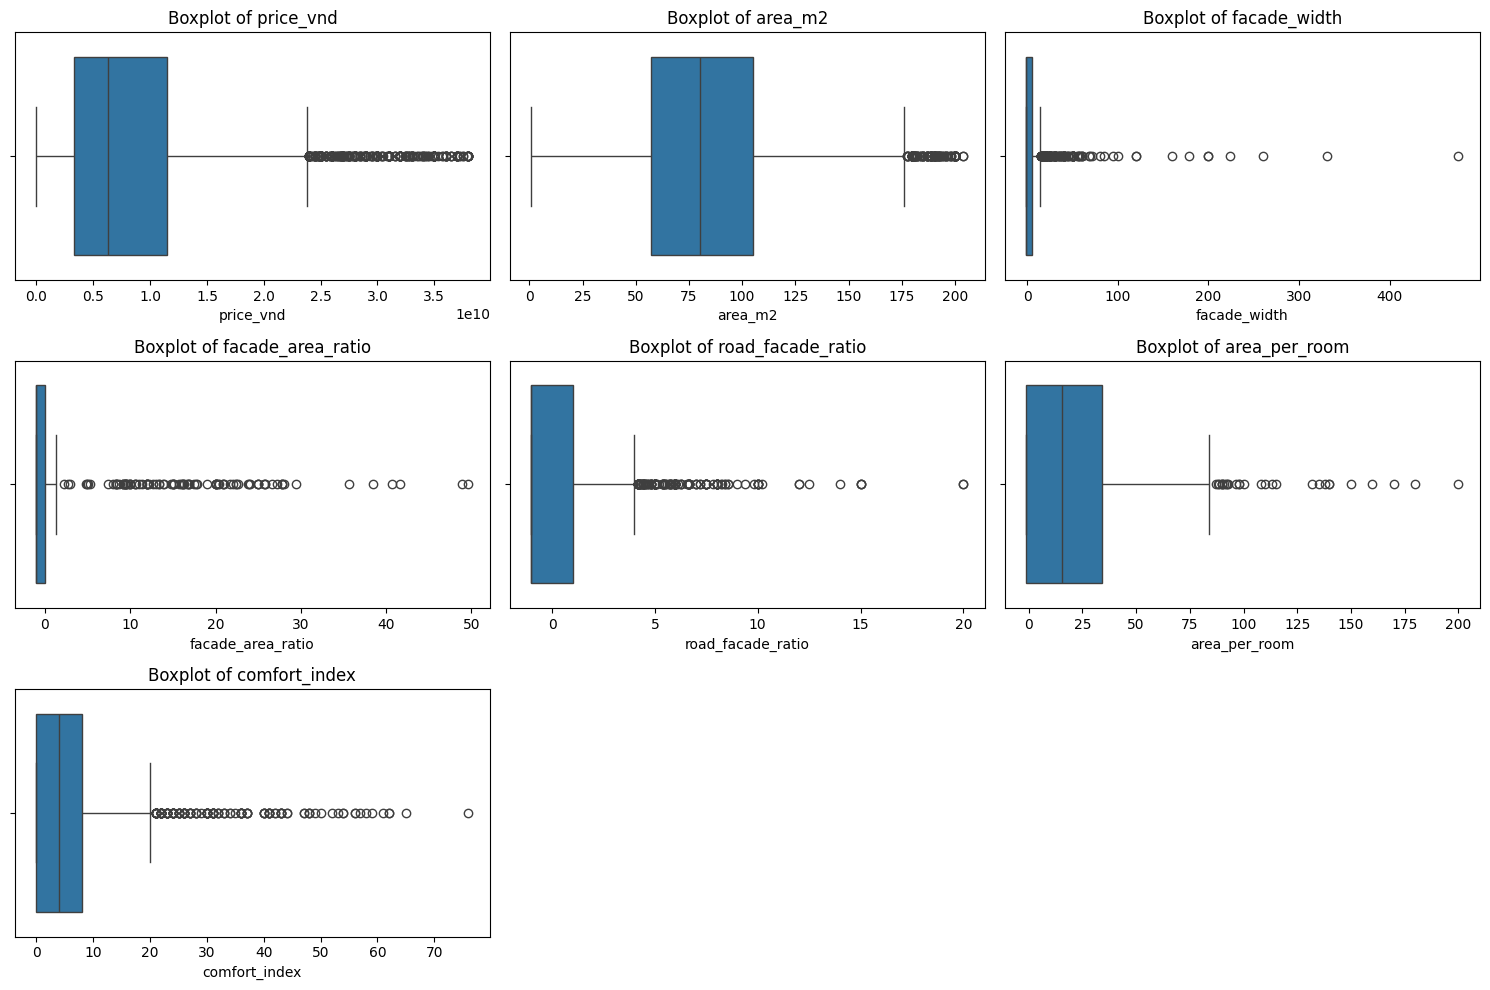

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc lại dữ liệu (đã xử lý missing value)
df = pd.read_csv('missing_value_data.csv')

# Điền median cho các cột thiếu ít
for col in ['latitude', 'longitude', 'price_per_m2_ratio']:
    median = df[col].median()
    df[col] = df[col].fillna(median)

# Điền -1 cho các cột thiếu nhiều (trên 30%)
cols_many_missing = ['bedroom', 'bathroom', 'facade_width', 'road_width', 'floor_count',
                     'facade_area_ratio', 'road_facade_ratio', 'area_per_room']
for col in cols_many_missing:
    df[col] = df[col].fillna(-1)

# Thống kê mô tả
print("Thống kê mô tả:")
print(df.describe())

# Vẽ boxplot cho các cột số
cols_to_plot = ['price_vnd', 'area_m2', 'facade_width', 'facade_area_ratio',
                'road_facade_ratio', 'area_per_room', 'comfort_index']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_plot):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
# Đọc lại dữ liệu và xử lý missing value như trước
df = pd.read_csv('missing_value_data.csv')
for col in ['latitude', 'longitude', 'price_per_m2_ratio']:
    median = df[col].median()
    df[col] = df[col].fillna(median)
cols_many_missing = ['bedroom', 'bathroom', 'facade_width', 'road_width', 'floor_count',
                     'facade_area_ratio', 'road_facade_ratio', 'area_per_room']
for col in cols_many_missing:
    df[col] = df[col].fillna(-1)
mask = (df['area_per_room'] == -1) & (df['bedroom'] > 0) & (df['bathroom'] > 0)
room_sum = df.loc[mask, 'bedroom'] + df.loc[mask, 'bathroom']
df.loc[mask, 'area_per_room'] = df.loc[mask, 'area_m2'] / room_sum

# Cắt ngưỡng outlier
clip_dict = {
    'facade_width': 20,
    'facade_area_ratio': 1,
    'road_facade_ratio': 5,
    'area_per_room': 100
}
for col, upper in clip_dict.items():
    # Chỉ cắt các giá trị > upper và khác -1
    df.loc[(df[col] > upper) & (df[col] != -1), col] = upper

# Kiểm tra lại thống kê mô tả sau khi cắt ngưỡng
print(df[['facade_width', 'facade_area_ratio', 'road_facade_ratio', 'area_per_room']].describe())
df.to_csv("outlier_data.csv", index=False)

       facade_width  facade_area_ratio  road_facade_ratio  area_per_room
count   5813.000000        5813.000000        5813.000000    5813.000000
mean       2.365388          -0.484186           0.078804      18.458257
std        4.376663           0.565784           1.587861      18.908117
min       -1.000000          -1.000000          -1.000000      -1.000000
25%       -1.000000          -1.000000          -1.000000      -1.000000
50%       -1.000000          -1.000000          -1.000000      15.500000
75%        5.000000           0.058824           1.000000      34.000000
max       20.000000           1.000000           5.000000     100.000000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Đọc lại dữ liệu và xử lý missing value, outlier như trước
df = pd.read_csv('clean_train_data.csv')
for col in ['latitude', 'longitude', 'price_per_m2_ratio']:
    median = df[col].median()
    df[col] = df[col].fillna(median)
cols_many_missing = ['bedroom', 'bathroom', 'facade_width', 'road_width', 'floor_count',
                     'facade_area_ratio', 'road_facade_ratio', 'area_per_room']
for col in cols_many_missing:
    df[col] = df[col].fillna(-1)
mask = (df['area_per_room'] == -1) & (df['bedroom'] > 0) & (df['bathroom'] > 0)
room_sum = df.loc[mask, 'bedroom'] + df.loc[mask, 'bathroom']
df.loc[mask, 'area_per_room'] = df.loc[mask, 'area_m2'] / room_sum
clip_dict = {
    'facade_width': 20,
    'facade_area_ratio': 1,
    'road_facade_ratio': 5,
    'area_per_room': 100
}
for col, upper in clip_dict.items():
    df.loc[(df[col] > upper) & (df[col] != -1), col] = upper

# 1. Tạo đặc trưng mới
df['price_per_area'] = df['price_vnd'] / df['area_m2']
df['room_density'] = (df['bedroom'] + df['bathroom']) / df['area_m2']

# 2. Log-transform các cột giá
df['price_vnd'] = np.log1p(df['price_vnd'])
df['price_per_m2_vnd'] = np.log1p(df['price_per_m2_vnd'])

# 3. Chuẩn hóa dữ liệu
numerical_cols = ['area_m2', 'latitude', 'longitude', 'price_per_m2_ratio', 'area_ratio',
                  'comfort_index', 'distance_to_center', 'price_per_area', 'room_density',
                  'bedroom', 'bathroom', 'facade_width', 'road_width', 'floor_count',
                  'facade_area_ratio', 'road_facade_ratio', 'area_per_room']  # Thêm các cột đã xử lý
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# In ra một vài dòng đầu tiên của DataFrame đã xử lý
print(df.head())
df.to_csv("normalize_data.csv", index=False)

    bedroom  bathroom  facade_width  road_width  floor_count  price_vnd  \
0  0.040771  0.155185     -0.769005   -0.584235    -0.672562  21.678777   
1 -0.908512 -0.838674     -0.769005   -0.584235    -0.672562  23.395343   
2  0.357199  0.486472      0.602020    1.565016     0.963255  22.332704   
3  1.306483  0.817759      4.029583    1.225661     1.372209  22.875028   
4  0.040771  0.155185     -0.769005   -0.584235    -0.672562  22.463732   

   price_per_m2_vnd   area_m2  latitude  longitude  price_per_m2_ratio  \
0         17.684208 -0.761334  1.083399  -0.871250           -0.690671   
1         14.214287 -1.883314 -0.618461   3.307345           -1.304914   
2         18.238319 -0.617897 -0.972672   0.279261           -0.221283   
3         18.269858  0.388680 -0.999742   0.041927           -0.185930   
4         18.107065 -0.164937 -0.998659   0.177697           -0.357001   

   area_ratio  area_per_room  comfort_index  facade_area_ratio  \
0   -0.761334       0.459723      -0.2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Đọc lại dữ liệu và xử lý missing value, outlier như trước
df = pd.read_csv('outlier_data.csv')
for col in ['latitude', 'longitude', 'price_per_m2_ratio']:
    median = df[col].median()
    df[col] = df[col].fillna(median)
cols_many_missing = ['bedroom', 'bathroom', 'facade_width', 'road_width', 'floor_count',
                     'facade_area_ratio', 'road_facade_ratio', 'area_per_room']
for col in cols_many_missing:
    df[col] = df[col].fillna(-1)
mask = (df['area_per_room'] == -1) & (df['bedroom'] > 0) & (df['bathroom'] > 0)
room_sum = df.loc[mask, 'bedroom'] + df.loc[mask, 'bathroom']
df.loc[mask, 'area_per_room'] = df.loc[mask, 'area_m2'] / room_sum
clip_dict = {
    'facade_width': 20,
    'facade_area_ratio': 1,
    'road_facade_ratio': 5,
    'area_per_room': 100
}
for col, upper in clip_dict.items():
    df.loc[(df[col] > upper) & (df[col] != -1), col] = upper

# 1. Tạo đặc trưng mới
df['price_per_area'] = df['price_vnd'] / df['area_m2']
df['room_density'] = (df['bedroom'] + df['bathroom']) / df['area_m2']

# 2. Log-transform các cột giá
df['price_vnd'] = np.log1p(df['price_vnd'])
df['price_per_m2_vnd'] = np.log1p(df['price_per_m2_vnd'])

# 3. Chuẩn hóa dữ liệu
numerical_cols = ['area_m2', 'latitude', 'longitude', 'price_per_m2_ratio', 'area_ratio',
                  'comfort_index', 'distance_to_center', 'price_per_area', 'room_density',
                  'bedroom', 'bathroom', 'facade_width', 'road_width', 'floor_count',
                  'facade_area_ratio', 'road_facade_ratio', 'area_per_room']  # Thêm các cột đã xử lý
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 4. Chọn features và target
X = df.drop('price_vnd', axis=1)
y = df['price_vnd']

# 5. Chia dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Bạn có thể thay đổi n_estimators
model.fit(X_train, y_train)

# 7. Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Kết quả đánh giá mô hình Random Forest:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Kết quả đánh giá mô hình Random Forest:
RMSE: 0.0529
MAE: 0.0211
R2 Score: 0.9964


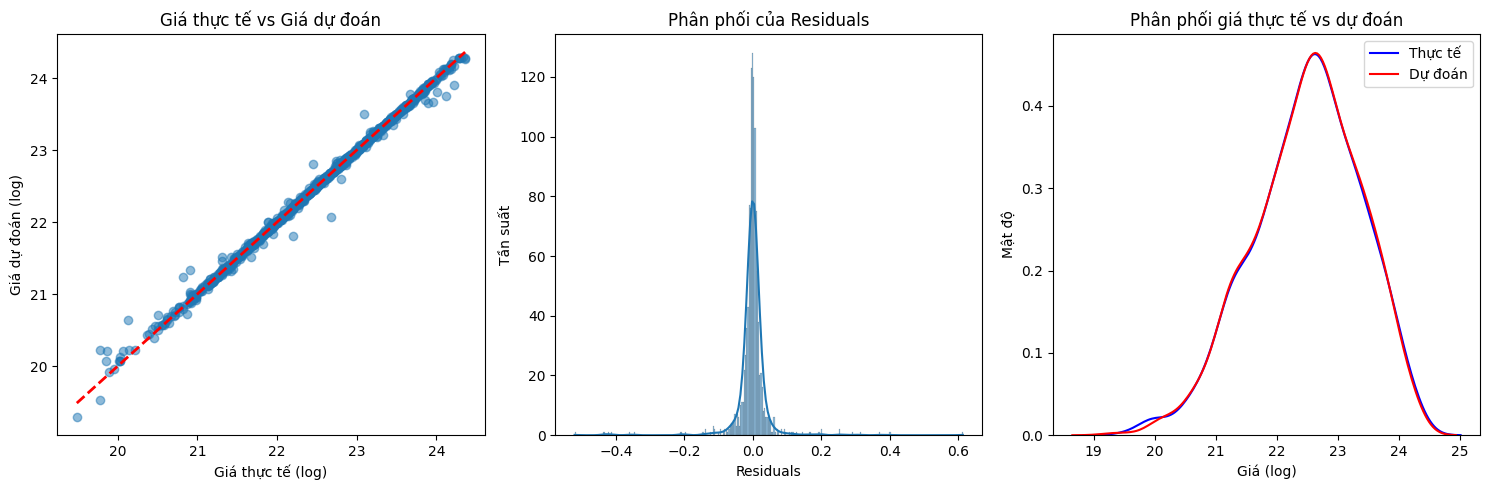


Thống kê về residuals:
Mean of residuals: -0.0009
Std of residuals: 0.0529
Min of residuals: -0.5204
Max of residuals: 0.6136


In [ ]:
# Tạo figure với 3 subplots
plt.figure(figsize=(15, 5))

# 1. Scatter plot giữa giá thực tế và giá dự đoán
plt.subplot(131)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Giá thực tế (log)')
plt.ylabel('Giá dự đoán (log)')
plt.title('Giá thực tế vs Giá dự đoán')

# 2. Histogram của residuals
plt.subplot(132)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Tần suất')
plt.title('Phân phối của Residuals')

# 3. So sánh phân phối
plt.subplot(133)
sns.kdeplot(data=y_test, label='Thực tế', color='blue')
sns.kdeplot(data=y_pred, label='Dự đoán', color='red')
plt.xlabel('Giá (log)')
plt.ylabel('Mật độ')
plt.title('Phân phối giá thực tế vs dự đoán')
plt.legend()

plt.tight_layout()
plt.show()

# In thêm một số thống kê về residuals
print("\nThống kê về residuals:")
print(f"Mean of residuals: {np.mean(residuals):.4f}")
print(f"Std of residuals: {np.std(residuals):.4f}")
print(f"Min of residuals: {np.min(residuals):.4f}")
print(f"Max of residuals: {np.max(residuals):.4f}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import joblib

# [Code xử lý dữ liệu giống như trước]
df = pd.read_csv('outlier_data.csv')
for col in ['latitude', 'longitude', 'price_per_m2_ratio']:
    median = df[col].median()
    df[col] = df[col].fillna(median)
cols_many_missing = ['bedroom', 'bathroom', 'facade_width', 'road_width', 'floor_count',
                     'facade_area_ratio', 'road_facade_ratio', 'area_per_room']
for col in cols_many_missing:
    df[col] = df[col].fillna(-1)
mask = (df['area_per_room'] == -1) & (df['bedroom'] > 0) & (df['bathroom'] > 0)
room_sum = df.loc[mask, 'bedroom'] + df.loc[mask, 'bathroom']
df.loc[mask, 'area_per_room'] = df.loc[mask, 'area_m2'] / room_sum
clip_dict = {
    'facade_width': 20,
    'facade_area_ratio': 1,
    'road_facade_ratio': 5,
    'area_per_room': 100
}
for col, upper in clip_dict.items():
    df.loc[(df[col] > upper) & (df[col] != -1), col] = upper

# Tạo đặc trưng mới
df['price_per_area'] = df['price_vnd'] / df['area_m2']
df['room_density'] = (df['bedroom'] + df['bathroom']) / df['area_m2']

# Log-transform giá
df['price_vnd'] = np.log1p(df['price_vnd'])
df['price_per_m2_vnd'] = np.log1p(df['price_per_m2_vnd'])

# Chuẩn hóa dữ liệu
numerical_cols = ['area_m2', 'latitude', 'longitude', 'price_per_m2_ratio', 'area_ratio',
                  'comfort_index', 'distance_to_center', 'price_per_area', 'room_density',
                  'bedroom', 'bathroom', 'facade_width', 'road_width', 'floor_count',
                  'facade_area_ratio', 'road_facade_ratio', 'area_per_room']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

X = df.drop('price_vnd', axis=1)
y = df['price_vnd']

# Train mô hình trên toàn bộ dữ liệu
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Lưu mô hình và scaler
model_data = {
    'model': model,
    'scaler': scaler,
    'numerical_cols': numerical_cols,
    'clip_dict': clip_dict
}

joblib.dump(model_data, 'house_price_model.joblib')
print("Đã lưu mô hình vào file 'house_price_model.joblib'")

# Kiểm tra xem file đã được tạo thành công chưa
import os
if os.path.exists('house_price_model.joblib'):
    print(f"File size: {os.path.getsize('house_price_model.joblib') / (1024*1024):.2f} MB")

Đã lưu mô hình vào file 'house_price_model.joblib'
File size: 41.33 MB


In [ ]:
import pandas as pd
import numpy as np
import joblib

# Hàm dự đoán giá nhà
def predict_house_price(data, model_path='house_price_model.joblib'):
    """
    Dự đoán giá nhà dựa trên dữ liệu đầu vào và mô hình đã train.

    Args:
        data (dict): Dictionary chứa thông tin về căn nhà (bedroom, bathroom, area_m2, ...)
        model_path (str): Đường dẫn đến file joblib chứa mô hình đã train.

    Returns:
        float: Giá nhà dự đoán (VND).
    """
    # Load mô hình
    model_data = joblib.load(model_path)
    model = model_data['model']
    scaler = model_data['scaler']
    numerical_cols = model_data['numerical_cols']
    clip_dict = model_data['clip_dict']

    # Chuyển dictionary thành DataFrame
    df = pd.DataFrame([data])

    # Xử lý missing value (điền -1)
    cols_many_missing = ['bedroom', 'bathroom', 'facade_width', 'road_width', 'floor_count',
                         'facade_area_ratio', 'road_facade_ratio', 'area_per_room']
    for col in cols_many_missing:
        if col not in df.columns:
            df[col] = -1  # Điền -1 nếu cột không có trong dữ liệu đầu vào
        else:
            df[col] = df[col].fillna(-1)

    # Xử lý missing value cho các cột còn lại (điền median)
    for col in ['latitude', 'longitude', 'price_per_m2_ratio']:
        if col not in df.columns:
            df[col] = df[col].median()  # Điền median nếu cột không có
        else:
            df[col] = df[col].fillna(df[col].median())

    # Tính lại area_per_room (nếu có thể)
    if 'area_per_room' in df.columns and 'bedroom' in df.columns and 'bathroom' in df.columns and 'area_m2' in df.columns:
        mask = (df['area_per_room'] == -1) & (df['bedroom'] > 0) & (df['bathroom'] > 0)
        if mask.any():
            room_sum = df.loc[mask, 'bedroom'] + df.loc[mask, 'bathroom']
            df.loc[mask, 'area_per_room'] = df.loc[mask, 'area_m2'] / room_sum

    # Cắt ngưỡng outlier
    for col, upper in clip_dict.items():
        if col in df.columns:
            df.loc[(df[col] > upper) & (df[col] != -1), col] = upper

    # Tạo đặc trưng mới
    if 'price_vnd' in df.columns and 'area_m2' in df.columns:
        df['price_per_area'] = df['price_vnd'] / df['area_m2']
    else:
        df['price_per_area'] = 0  # Giá trị mặc định nếu không đủ thông tin
    if 'bedroom' in df.columns and 'bathroom' in df.columns and 'area_m2' in df.columns:
        df['room_density'] = (df['bedroom'] + df['bathroom']) / df['area_m2']
    else:
        df['room_density'] = 0  # Giá trị mặc định nếu không đủ thông tin

    # Log-transform giá (nếu có)
    if 'price_vnd' in df.columns:
        df['price_vnd'] = np.log1p(df['price_vnd'])
    if 'price_per_m2_vnd' in df.columns:
        df['price_per_m2_vnd'] = np.log1p(df['price_per_m2_vnd'])

    # Chuẩn hóa dữ liệu
    # Đảm bảo chỉ chuẩn hóa các cột số có trong dữ liệu huấn luyện
    numerical_cols_present = [col for col in numerical_cols if col in df.columns]
    df[numerical_cols_present] = scaler.transform(df[numerical_cols_present])

    # Chọn các features sử dụng để train mô hình
    X = df[[col for col in df.columns if col != 'price_vnd']]

    # Dự đoán giá (chỉ dự đoán nếu có dữ liệu)
    if not X.empty:
        predicted_price_log = model.predict(X)
        predicted_price = np.expm1(predicted_price_log)[0]  # Chuyển từ log về giá trị thực
    else:
        predicted_price = 0  # Giá trị mặc định nếu không có dữ liệu

    return predicted_price

# Ví dụ sử dụng
new_house_data = {
    'bedroom': 3,
    'bathroom': 2,
    'facade_width': 5,
    'road_width': 10,
    'floor_count': 4,
    'price_vnd': 5000000000,
    'price_per_m2_vnd': 66666667,
    'area_m2': 75,
    'latitude': 21.0278,
    'longitude': 105.8342,
    'price_per_m2_ratio': 0.8,
    'area_ratio': 0.6,
    'area_per_room': 25,
    'comfort_index': 7,
    'facade_area_ratio': 0.1,
    'road_facade_ratio': 2,
    'distance_to_center': 0.5,
    'location_cluster': 2,
}
# Dự đoán giá
predicted_price = predict_house_price(new_house_data)
print(f"Giá nhà dự đoán: {predicted_price:,.0f} VND")

Giá nhà dự đoán: 5,645,859,918 VND
